# Librerías y Configuración

In [51]:
from IPython.display import display                             # Liberia para imprimir variables
import sympy as sp                                              # Librería de calculo simbólico
import numpy as np                                              # Librería de calculo numérico
import matplotlib.pyplot as plt                                 # Librería de gráficas
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300
sp.init_printing(use_unicode = True, use_latex="mathjax")       # Print en LateX para sympy

# Planteamiento de ecuaciones
![Alt text](image.png)

### Variables Simbólicas

In [52]:
# Parámetros
a = sp.symbols("a")                                             # Longitud del eslabón 2
b = sp.symbols("b")                                             # Longitud del eslabón 3
c = sp.symbols("c")                                             # Posición vertical de la corredera
theta_2_0 = sp.symbols('\\theta__2_0')                          # Angulo inicial del eslabón 2
omega_2 = sp.symbols("omega__2")                                # Velocidad angular del eslabón 2

## Incógnitas (q)
R_1_x, R_1_y, theta_1 = sp.symbols('R^1_x R^1_y theta__1')      # Eslabón 1
R_2_x, R_2_y, theta_2 = sp.symbols("R^2_x R^2_y theta__2")      # Eslabón 2
R_3_x, R_3_y, theta_3 = sp.symbols("R^3_x R^3_y theta__3")      # Eslabón 3
R_4_x, R_4_y, theta_4 = sp.symbols("R^4_x R^4_y theta__4")      # Eslabón 4
# Vector columna q
q = sp.Matrix([R_1_x, R_1_y, theta_1, R_2_x, R_2_y, theta_2, R_3_x, R_3_y, theta_3, R_4_x, R_4_y, theta_4])

## Incógnitas (q_punto)
R_1_x_diff, R_1_y_diff, theta_1_diff = sp.symbols(r"\dot{R^1_x} \dot{R^1_y} \dot{\theta^1}")      # Eslabón 1
R_2_x_diff, R_2_y_diff, theta_2_diff = sp.symbols(r"\dot{R^2_x} \dot{R^2_y} \dot{\theta^2}")      # Eslabón 2
R_3_x_diff, R_3_y_diff, theta_3_diff = sp.symbols(r"\dot{R^3_x} \dot{R^3_y} \dot{\theta^3}")      # Eslabón 3
R_4_x_diff, R_4_y_diff, theta_4_diff = sp.symbols(r"\dot{R^4_x} \dot{R^4_y} \dot{\theta^4}")      # Eslabón 4
# Vector columna q_punto
q_diff = sp.Matrix([R_1_x_diff, R_1_y_diff, theta_1_diff, R_2_x_diff, R_2_y_diff, theta_2_diff, R_3_x_diff,
                    R_3_y_diff, theta_3_diff, R_4_x_diff, R_4_y_diff, theta_4_diff])

# Variable de tiempo
t = sp.symbols("t")

# Imprimir tupla con todas variables para verificar su correcta representación.
a, b, c, theta_2_0, omega_2, t, q, q_diff


⎛                          ⎡ R¹ₓ  ⎤  ⎡ \dot{R_x}__1  ⎤⎞
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢R_y__1⎥  ⎢ \dot{R_y}__1  ⎥⎟
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢  θ¹  ⎥  ⎢\dot{\theta__1}⎥⎟
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢ R²ₓ  ⎥  ⎢ \dot{R_x}__2  ⎥⎟
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢R_y__2⎥  ⎢ \dot{R_y}__2  ⎥⎟
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢  θ²  ⎥  ⎢\dot{\theta__2}⎥⎟
⎜a, b, c, \theta²₀, ω², t, ⎢      ⎥, ⎢               ⎥⎟
⎜                          ⎢ R³ₓ  ⎥  ⎢ \dot{R_x}__3  ⎥⎟
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢R_y__3⎥  ⎢ \dot{R_y}__3  ⎥⎟
⎜                          ⎢      ⎥  ⎢               ⎥⎟
⎜                          ⎢  θ³  ⎥  ⎢\dot{\theta__3}⎥⎟
⎜                          ⎢      ⎥  ⎢          

In [53]:
# Ecuaciones de Juntas: (igualadas a 0)

## Junta Fija 1
e1 = R_1_x
e2 = R_1_y
e3 = theta_1

## Junta 2 - Revoluta
e4 = R_2_x - ((a/2) * sp.cos(theta_2))
e5 = R_2_y - ((a/2) * sp.sin(theta_2))

## Junta 3 - Revoluta
e6 = R_2_x + ((a/2) * sp.cos(theta_2)) - R_3_x - ((b/2) * sp.cos(theta_3))
e7 = R_2_y + ((a/2) * sp.sin(theta_2)) - R_3_y - ((b/2) * sp.sin(theta_3))

## Junta 4 - Revoluta
e8 = R_4_x - R_3_x + ((b/2) * sp.cos(theta_3))
e9 = R_4_y - R_3_y + ((b/2) * sp.sin(theta_3))

# Junta 5 - Prismática
e10 = theta_4       # El angulo de inclinación la junta prismática es constante y es 0
e11 = R_4_y - c     # La corredera no se mueve en el eje y

## Ecuaciones de gobierno para junta Revoluta
e12 = theta_2 - theta_2_0 - (omega_2*t)

# Imprimir tupla con ecuaciones para verificar
e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12

⎛                       a⋅cos(θ²)           a⋅sin(θ²)              a⋅cos(θ²)  
⎜R¹ₓ, R_y__1, θ¹, R²ₓ - ─────────, R_y__2 - ─────────, R²ₓ - R³ₓ + ───────── -
⎝                           2                   2                      2      

 b⋅cos(θ³)                    a⋅sin(θ²)   b⋅sin(θ³)               b⋅cos(θ³)   
 ─────────, R_y__2 - R_y__3 + ───────── - ─────────, -R³ₓ + R⁴ₓ + ─────────, -
     2                            2           2                       2       

                  b⋅sin(θ³)                                       ⎞
R_y__3 + R_y__4 + ─────────, θ⁴, R_y__4 - c, -\theta²₀ - ω²⋅t + θ²⎟
                      2                                           ⎠

### Matrices de Calculo

In [54]:
## Posición:
# Vector de ecuaciones de restricción
C = sp.Matrix([e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12])
# Matriz Jacobiana
C_q = C.jacobian(q)

## Velocidad:
# Derivada temporal de vector de ecuaciones de restricción
C_t = C.diff(t)

## Aceleración:
# Derivada temporal de segundo orden del vector de ecuaciones de restricción
C_t_t = C_t.diff(t)
# Derivada temporal de la matriz Jacobiana
C_q_t = C_q.diff(t)
# Jacobiana del producto de la matriz Jacobiana original por el vector de velocidades
C_q_times_q_diff = (C_q*q_diff).jacobian(q)

Qd = -(C_q_times_q_diff*q_diff) -(2*C_q_t*q_diff) -(C_t_t)

C, C_q, C_t, C_t_t, C_q_t, C_q_times_q_diff, Qd

⎛                                                                             
⎜                                                                             
⎜                                                                             
⎜⎡                  R¹ₓ                  ⎤  ⎡1  0  0  0  0       0       0   0
⎜⎢                                       ⎥  ⎢                                 
⎜⎢                R_y__1                 ⎥  ⎢0  1  0  0  0       0       0   0
⎜⎢                                       ⎥  ⎢                                 
⎜⎢                  θ¹                   ⎥  ⎢0  0  1  0  0       0       0   0
⎜⎢                                       ⎥  ⎢                                 
⎜⎢                  a⋅cos(θ²)            ⎥  ⎢                a⋅sin(θ²)        
⎜⎢            R²ₓ - ─────────            ⎥  ⎢0  0  0  1  0   ─────────   0   0
⎜⎢                      2                ⎥  ⎢                    2            
⎜⎢                                       ⎥  ⎢       

# Calculo numérico

### Parámetros

In [55]:
# Lista con parámetros del mecanismo
mechanism_parameters = [ # Eslabón 2
                        (a, 20),                        # Distancia en mm
                        (theta_2_0, 0),                 # Angulo inicial 0°
                        (omega_2, 2*sp.pi),             # 360°/s
                        # Eslabón 3
                        (b, 60),                        # Distancia en mm
                        # eslabón 4
                        (c, 25)]                        # Distancia en mm



## Parámetros de simulación
max_iter = 10           # Numero de iteraciones
max_error = 1e-8        # Error admisible
steps = 200             # Numero de muestras por segundo
time = 1                # Tiempo de simulación en segundos


### Remplazar parámetros en matrices

In [56]:

C = C.subs(mechanism_parameters)
C_q = C_q.subs(mechanism_parameters)
C_t = C_t.subs(mechanism_parameters)
Qd = Qd.subs(mechanism_parameters)

C, C_q, C_t, Qd

⎛                                                                             
⎜                                                                             
⎜                                                                             
⎜⎡                   R¹ₓ                   ⎤  ⎡1  0  0  0  0       0       0  
⎜⎢                                         ⎥  ⎢                               
⎜⎢                 R_y__1                  ⎥  ⎢0  1  0  0  0       0       0  
⎜⎢                                         ⎥  ⎢                               
⎜⎢                   θ¹                    ⎥  ⎢0  0  1  0  0       0       0  
⎜⎢                                         ⎥  ⎢                               
⎜⎢            R²ₓ - 10⋅cos(θ²)             ⎥  ⎢0  0  0  1  0  10⋅sin(θ²)   0  
⎜⎢                                         ⎥  ⎢                               
⎜⎢           R_y__2 - 10⋅sin(θ²)           ⎥  ⎢0  0  0  0  1  -10⋅cos(θ²)  0  
⎜⎢                                         ⎥  ⎢     

### Aplicación de método de Newton-Raphson

In [57]:
# Numero de incógnitas
q_size = q.shape[0]

# Variables de almacenamiento de resultados (cada tiempo es una fila)
q_result = np.zeros((steps + 1, q_size))
q_diff_result = np.zeros((steps + 1, q_size))
q_diff2_result = np.zeros((steps + 1, q_size))
time_vector = np.zeros((steps + 1, 1))

# Valores iniciales
q_values = np.array([0, 0, 0, 9, 0, 0, 40, 10, 0, 70, 20, 0]).reshape(-1,1)
q_diff_values = np.zeros((q_size, 1))

# Lista de valores de q y q_diff
q_values_list =  np.vstack((np.column_stack([q, q_values]), [t, 0]))
q_diff_values_list = np.column_stack([q_diff, q_diff_values])




# Posición:    C_q(t,q)*deltaQ  = -C(t)           <- Newton-Raphson
# Velocidad:   C_q(t,q)*q_diff  = -C_t(t)         <- Sistema de ecuaciones lineales
# Aceleración: C_q(t,q)*q_diff2 = Qd(q, q_diff)   <- Sistema de ecuaciones lineales

for step in range(steps+1):
    i: int = 0
    current_error: int = 1
    # tomar valores de q de la iteración anterior
    # if step > 0:
    #     q_values_list[:,1] = q_result[:,step-1]

    while(i<max_iter and current_error > max_error):

        # Construir lista de valores de q
        q_values_list[0:q_size,1] = q_values.reshape(-1)
        q_values_list[q_size,1] = (time/steps) * step

        # Calcular las matrices de coeficientes y Constantes
        coefficients_matrix = np.array(C_q.subs(q_values_list)).astype(np.float64)
        constants_vector = np.array(C.subs(q_values_list)).astype(np.float64)

        # Calcular delta
        delta_q = np.linalg.solve(coefficients_matrix, -constants_vector)

        # Calcular nuevo q
        q_values = q_values + delta_q

        # Calcular error máximo
        current_error = np.linalg.norm(constants_vector)

        i = i + 1

    # Construir lista de valores de q
    q_values_list[0:q_size,1] = q_values.reshape(-1)

    ## Velocidades
    constants_vector = np.array(C_t.subs((q_values_list))).astype(np.float64)
    q_diff_values = np.linalg.solve(coefficients_matrix, -constants_vector)

    # Construir lista de valores de q_diff
    q_diff_values_list[:,1] = q_diff_values.reshape(-1)

    ## Aceleraciones
    constants_vector = np.array(Qd.subs(np.vstack((q_values_list,q_diff_values_list)))).astype(np.float64)
    q_diff2_values = np.linalg.solve(coefficients_matrix, constants_vector)



    # Guardar resultado de la iteración
    time_vector[step] = (time/steps) * step
    q_result[step] = q_values.reshape(-1)
    q_diff_result[step] = q_diff_values.reshape(-1)
    q_diff2_result[step] = q_diff2_values.reshape(-1)
    # Print Time, Index, Error
    print("Time: ", (time/steps) * step, ", Iteration: ", i,", Error: ", current_error)




Time:  0.0 , Iteration:  5 , Error:  2.4677151732045832e-33
Time:  0.005 , Iteration:  4 , Error:  7.324106932556485e-15
Time:  0.01 , Iteration:  4 , Error:  3.972055050272191e-15
Time:  0.015 , Iteration:  4 , Error:  3.554452609122142e-15
Time:  0.02 , Iteration:  4 , Error:  8.140290468432643e-15
Time:  0.025 , Iteration:  4 , Error:  2.2241974649864903e-16
Time:  0.03 , Iteration:  4 , Error:  1.790217609320188e-15
Time:  0.035 , Iteration:  4 , Error:  1.776360918779956e-15
Time:  0.04 , Iteration:  4 , Error:  7.324110392572612e-15
Time:  0.045 , Iteration:  4 , Error:  3.552729325431221e-15
Time:  0.05 , Iteration:  4 , Error:  1.8312088344626728e-15
Time:  0.055 , Iteration:  4 , Error:  7.956555802806589e-15
Time:  0.06 , Iteration:  4 , Error:  1.7765050706156052e-15
Time:  0.065 , Iteration:  4 , Error:  3.972062045560045e-15
Time:  0.07 , Iteration:  4 , Error:  1.7763731568628646e-15
Time:  0.075 , Iteration:  4 , Error:  7.944109344869929e-15
Time:  0.08 , Iteration:  4 

# Comparación de Resultados

### Carga de datos de inventor

In [58]:
inventor_data = np.genfromtxt("./inventorData.csv", delimiter=",", names=True)
print(inventor_data['R3_x'])


[47.2719  47.4039  47.5116  47.5951  47.6545  47.6896  47.7008  47.6879
 47.6512  47.5909  47.50703 47.39994 47.2699  47.117   46.9418  46.7445
 46.5254  46.285   46.0237  45.7418  45.4398  45.11829 44.7776  44.4184
 44.041   43.6462  43.2344  42.8061  42.3621  41.9029  41.4291  40.9413
 40.4402  39.9264  39.4006  38.86338 38.3155  37.7575  37.1902  36.6142
 36.03009 35.4387  34.8406  34.2364  33.627   33.0128  32.3946  31.7731
 31.1488  30.5225  29.8947  29.266   28.6372  28.0087  27.3813  26.7554
 26.1317  25.5107  24.8929  24.279   23.6694  23.0646  22.4652  21.8716
 21.2843  20.7037  20.1304  19.5647  19.007   18.45787 17.9176  17.3865
 16.865   16.3535  15.85235 15.3618  14.8822  14.4138  13.9569  13.51192
 13.079   12.6584  12.2503  11.8551  11.4729  11.104   10.74846 10.4066
 10.0785   9.76441  9.46446  9.17879  8.90755  8.65088  8.4089   8.18173
  7.96947  7.77224  7.59011  7.42319  7.27155  7.13527  7.01442  6.90907
  6.81927  6.74508  6.68654  6.64371  6.61663  6.60533  6.609

### Gráficas
Dentro del diccionario `inventor_data` se encuentran cargados los resultados de inventor, mientras que en las matrices `q_result`, `q_diff_result` y `q_diff2_result` se encuentran los resultados de la aplicación del método computacional

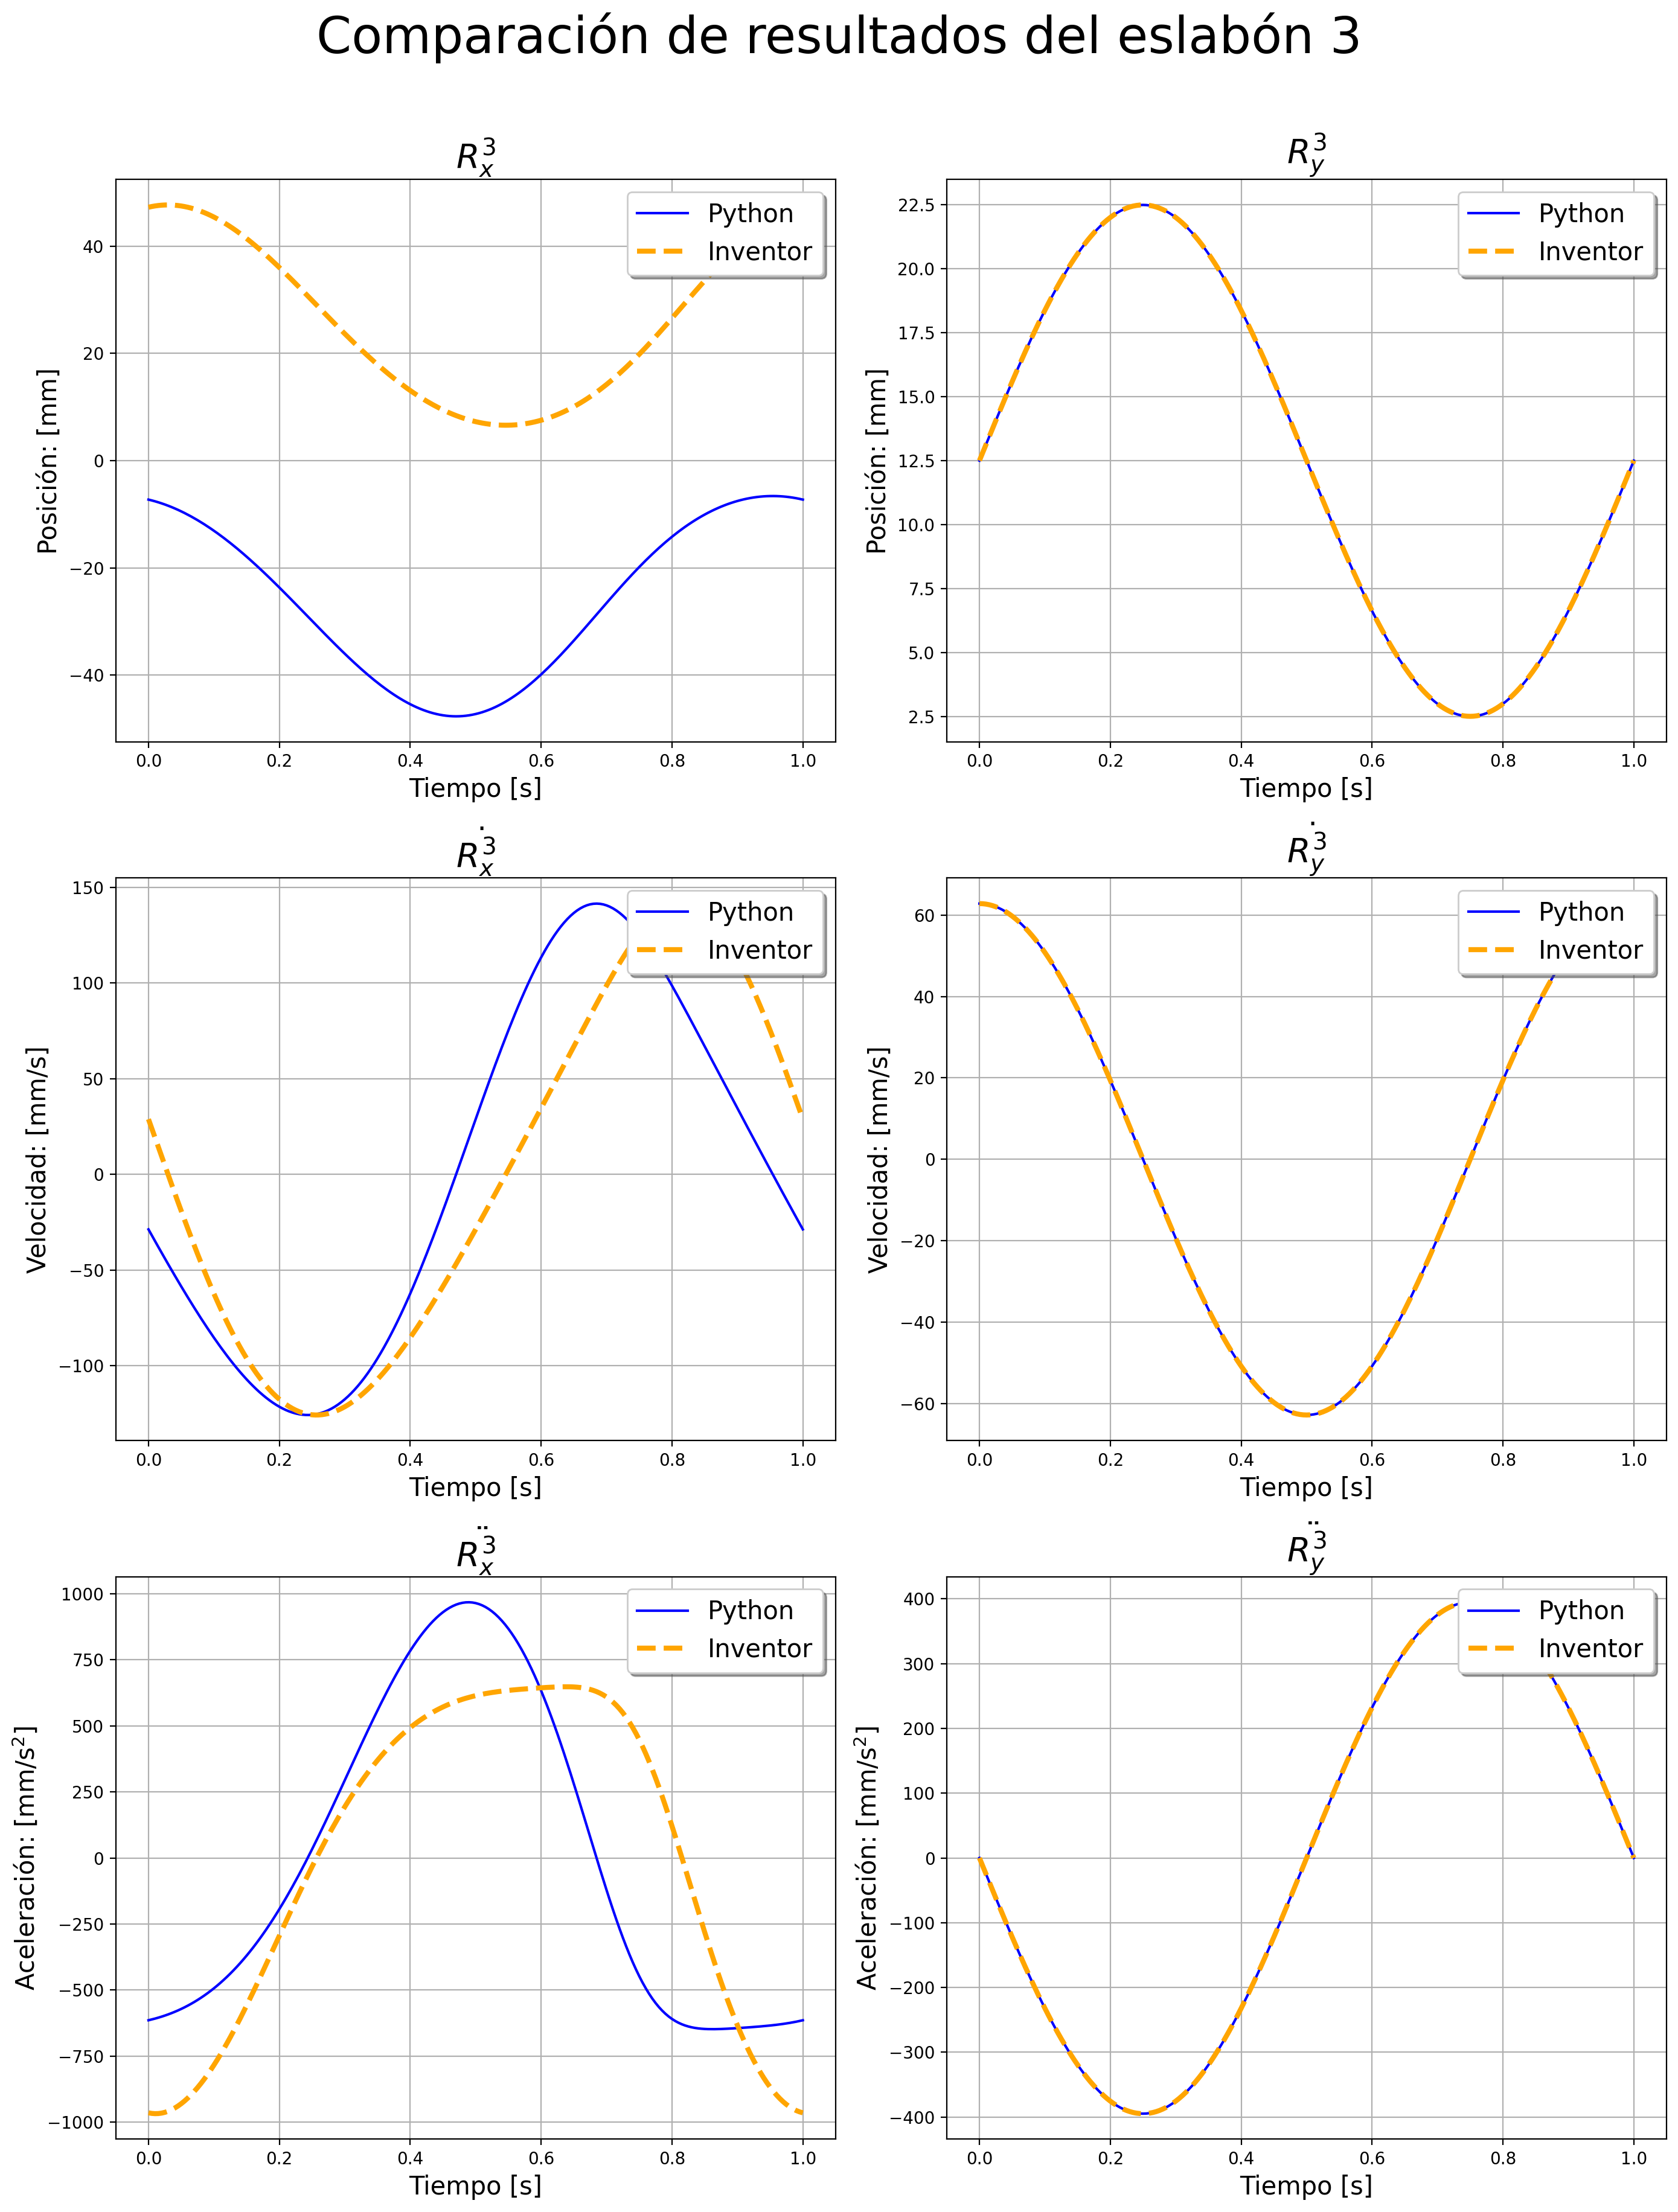

In [59]:

fig, ax = plt.subplots(3, 2, figsize=(14, 18))

fig.suptitle("Comparación de resultados del eslabón 3", fontsize=30, y=1.015)

# R3_x
ax[0,0].plot(time_vector, q_result[:,6], ls="-",linewidth=1.5, color ="blue", label = "Python")
ax[0,0].plot(time_vector, inventor_data['R3_x'], ls="--", linewidth=3, color = "orange", label = "Inventor")
ax[0,0].grid()
ax[0,0].set_xlabel("Tiempo [s]", fontsize=15)
ax[0,0].set_ylabel("Posición: [mm]", fontsize=15)
ax[0,0].set_title("$R^3_x$", fontsize=20)
ax[0,0].legend(loc="upper right", fontsize=15, shadow=True)

# R3_y
ax[0,1].plot(time_vector, q_result[:,7], ls="-",linewidth=1.5, color ="blue", label = "Python")
ax[0,1].plot(time_vector, inventor_data['R3_y'], ls="--", linewidth=3, color = "orange", label = "Inventor")
ax[0,1].grid()
ax[0,1].set_xlabel("Tiempo [s]", fontsize=15)
ax[0,1].set_ylabel("Posición: [mm]", fontsize=15)
ax[0,1].set_title("$R^3_y$", fontsize=20)
ax[0,1].legend(loc="upper right", fontsize=15, shadow=True)

# R3_x_diff
ax[1,0].plot(time_vector, q_diff_result[:,6], ls="-",linewidth=1.5, color ="blue", label = "Python")
ax[1,0].plot(time_vector, inventor_data['R3_x_diff'], ls="--", linewidth=3, color = "orange", label = "Inventor")
ax[1,0].grid()
ax[1,0].set_xlabel("Tiempo [s]", fontsize=15)
ax[1,0].set_ylabel("Velocidad: [mm/s]", fontsize=15)
ax[1,0].set_title("$\dot{R^3_x}$", fontsize=20)
ax[1,0].legend(loc="upper right", fontsize=15, shadow=True)

# R3_y_diff
ax[1,1].plot(time_vector, q_diff_result[:,7], ls="-",linewidth=1.5, color ="blue", label = "Python")
ax[1,1].plot(time_vector, inventor_data['R3_y_diff'], ls="--", linewidth=3, color = "orange", label = "Inventor")
ax[1,1].grid()
ax[1,1].set_xlabel("Tiempo [s]", fontsize=15)
ax[1,1].set_ylabel("Velocidad: [mm/s]", fontsize=15)
ax[1,1].set_title("$\dot{R^3_y}$", fontsize=20)
ax[1,1].legend(loc="upper right", fontsize=15, shadow=True)

# R3_x_diff2
ax[2,0].plot(time_vector, q_diff2_result[:,6], ls="-",linewidth=1.5, color ="blue", label = "Python")
ax[2,0].plot(time_vector, inventor_data['R3_x_diff2'], ls="--", linewidth=3, color = "orange", label = "Inventor")
ax[2,0].grid()
ax[2,0].set_xlabel("Tiempo [s]", fontsize=15)
ax[2,0].set_ylabel("Aceleración: [mm/s$^2$]", fontsize=15)
ax[2,0].set_title("$\ddot{R^3_x}$", fontsize=20)
ax[2,0].legend(loc="upper right", fontsize=15, shadow=True)

# R3_y_diff2
ax[2,1].plot(time_vector, q_diff2_result[:,7], ls="-",linewidth=1.5, color ="blue", label = "Python")
ax[2,1].plot(time_vector, inventor_data['R3_y_diff2'], ls="--", linewidth=3, color = "orange", label = "Inventor")
ax[2,1].grid()
ax[2,1].set_xlabel("Tiempo [s]", fontsize=15)
ax[2,1].set_ylabel("Aceleración: [mm/s$^2$]", fontsize=15)
ax[2,1].set_title("$\ddot{R^3_y}$", fontsize=20)
ax[2,1].legend(loc="upper right", fontsize=15, shadow=True)

plt.tight_layout()
plt.show()